In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [6]:
cancer = load_breast_cancer()
print('Base rate:', 1 - np.mean(cancer.target))

Base rate: 0.37258347978910367


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

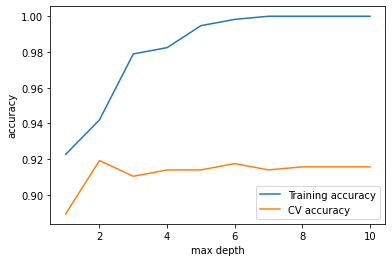

In [7]:
train_scores = []
cv_scores = []
for depth in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=101)
    clf.fit(cancer.data, cancer.target)
    train_scores.append(clf.score(cancer.data, cancer.target))
    cv_scores.append(np.mean(cross_val_score(clf, cancer.data, cancer.target, cv=10)))
    
plt.plot(range(1, 11), train_scores, label='Training accuracy')
plt.plot(range(1, 11), cv_scores, label='CV accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

Text(0, 0.5, 'accuracy')

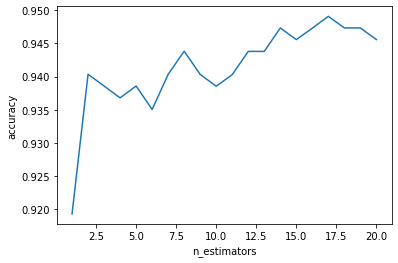

In [8]:
accuracy = []
for n_estimators in range(1, 21):
    clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=2, random_state=101)
    scores = cross_val_score(clf, cancer.data, cancer.target, cv=10)
    accuracy.append(np.mean(scores))
plt.plot(range(1, 21), accuracy)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

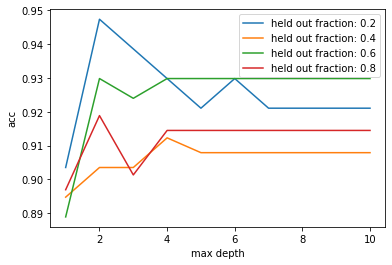

In [9]:
for held_out_fraction in [0.2, 0.4, 0.6, 0.8]:
    accuracy = []
    train_x, test_x, train_y, test_y = train_test_split(
        cancer.data, cancer.target, test_size=held_out_fraction, random_state=101)
    for depth in range(1,11):
        clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=101)
        clf.fit(train_x, train_y)
        accuracy.append(clf.score(test_x, test_y))
    plt.plot(range(1, 11), accuracy, label='held out fraction: ' + str(held_out_fraction))
plt.xlabel('max depth')
plt.ylabel('acc')
plt.legend()